In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time as time
from numpy.linalg import inv
from lib.simubot import hom, loc,simubot
from lib.dibrobot import dibrobot
from lib.utils import c2m, polares, distancia_angular, distancia

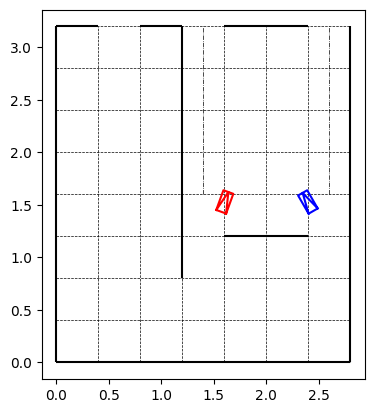

In [6]:
def escenario():
   # Escenario
    plt.vlines(0, 0, 3.2, colors='k',lw=1.5)
    plt.vlines(1.2, 0.8, 3.2, colors='k',lw=1.5)
    plt.vlines(2.8, 0, 3.2, colors='k',lw=1.5)
    plt.hlines(0, 0, 2.8, colors='k',lw=1.5)
    plt.hlines(3.2, 0, 0.4, colors='k',lw=1.5)
    plt.hlines(3.2, 0.8, 1.2, colors='k',lw=1.5)
    plt.hlines(3.2, 1.6, 2.4, colors='k',lw=1.5)
    plt.hlines(1.2, 1.6, 2.4, colors='k',lw=1.5)
    # Grid
    plt.hlines(0.4, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(0.8, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(1.2, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(1.6, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(2.0, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(2.4, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(2.8, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(3.2, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.vlines(0.4, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(0.8, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(1.2, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(1.6, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(2, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(2.4, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(2.8, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(1.4, 1.6, 3.2, colors='k',ls='-.',lw=0.5)
    plt.vlines(2.6, 1.6, 3.2, colors='k',ls='-.',lw=0.5)
    

    plt.gca().set_aspect('equal', adjustable='box')

escenario()
dibrobot(np.array([c2m(4),c2m(3.8), np.deg2rad(70)]),'r')
dibrobot(np.array([c2m(6),c2m(3.8), np.deg2rad(120)]),'b')
plt.show()

In [49]:
def sensor_izq(x, pared_izq):
    d2 = np.fabs(x[0] - pared_izq)
    alpha = x[2] - np.pi/2
    # alpha = -np.pi/6 if alpha < -np.pi/6 else np.pi/6 if alpha > np.pi/6 else alpha

    d1 = d2 / np.cos(alpha)
    return  d1

def sensor_derecha(x, pared_dch):
    d2 = np.fabs(pared_dch - x[0])
    alpha = x[2] - np.pi/2
    # alpha = -np.pi/8 if alpha < -np.pi/8 else np.pi/8 if alpha > np.pi/8 else alpha
    d1 = d2 / np.cos(alpha)
    return  d1
    

In [97]:
w_hist = []
v_hist = []
def seguimiento_pared(robot=np.array([c2m(4),c2m(3.8), np.deg2rad(70)]), objetivo=np.array([c2m(3.5),c2m(8), np.deg2rad(90)]), pared='izquierda', sitio_pared=c2m(3), k1=-0.2, k2=2.0):
    T=0.1
    global w_hist, v_hist
    escenario()
    dibrobot(robot,'r')
    dibrobot(objetivo,'b')
    w_hist = []
    v_hist = []
    # plt.show()
    
    # w_max = 2.0
    # v_max = 1.5
    
    # rho_max = 8.0
    # alpha_max = np.pi
    # beta_max = np.pi

    # kp, ka, kb = v_max/rho_max, w_max/alpha_max, w_max/beta_max
    # # kp, ka, kb = 0.2, 0.8, 0.4
    # print(kp, ka, kb)
    # assert kp > 0.0 and kb > 0.0 and ka - kp > 0.0
    
    #variables para controlar el robot
    ##TODO: completar las variables
    d_min = c2m(0.5)
    # print(d_min,d_max)
    v_c = 0.1
    w_max = np.pi
    dD = 0.0
    wXr = robot
    wXo = objetivo
    # rWo = np.dot(inv(hom(robot)),hom(objetivo))
    if pared == 'izquierda':
        d = sensor_izq(wXr, sitio_pared)
    elif pared == 'derecha':
        d = sensor_derecha(wXr, sitio_pared)
    # print("Distancia a la pared: ", d)  
    try: 
        while distancia(wXr,wXo)>0.05:
            # print("Posición del robot --> ", wXr)
            # print("Dd --> ", Dd)
            w = k1 * (d_min - d) + k2* dD
            if w > 0:
                w_c = min(w, w_max)
            else:
                w_c = max(w, -w_max)
            
            w_hist.append(w_c)
            v_hist.append(v_c)
            # print("Velocidad lineal: ", v_c)
            # print("Velocidad angular: ", w_c)
            dibrobot(wXr,'r')
            wXr = simubot([v_c, w_c], wXr, T)
            if pared == 'izquierda':
                d1 = sensor_izq(wXr, sitio_pared)
            elif pared == 'derecha':
                d1 = sensor_derecha(wXr, sitio_pared)
            dD = d1 - d
            d = d1
            # if wXr[1] > 2.0:
            #     break
            # plt.show()
        
            
            # print(distancia_angular(wXr[2],wXo[2]),distancia(wXr,wXo))
        plt.show() 
    except KeyboardInterrupt:
        print("Se ha interrumpido el proceso")
    plt.show()

def plot_historial():
    plt.plot(w_hist, 'r')
    plt.plot(v_hist, 'b')
    plt.title('Perfil de velocidad del robot')
    plt.xlabel('Tiempo [T=0.1]')
    plt.ylabel('Velocidad [m/s]')
    plt.legend(['Velocidad angular', 'Velocidad lineal'])
    plt.grid(True)
    plt.show()

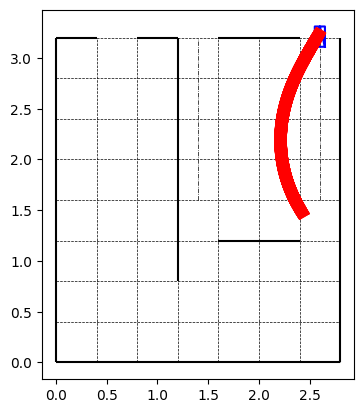

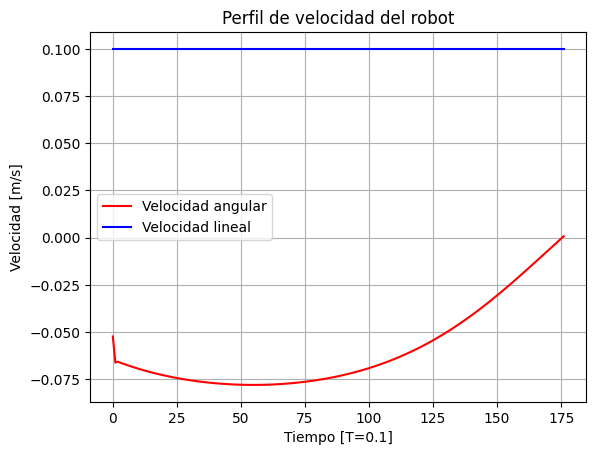

In [98]:
seguimiento_pared(robot=np.array([c2m(6),c2m(3.8), np.deg2rad(120)]), objetivo=np.array([c2m(6.5),c2m(8), np.deg2rad(90)]), pared='derecha', sitio_pared=c2m(7), k1=0.2, k2=-3.0)
plot_historial()


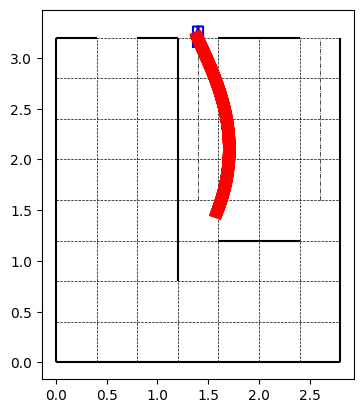

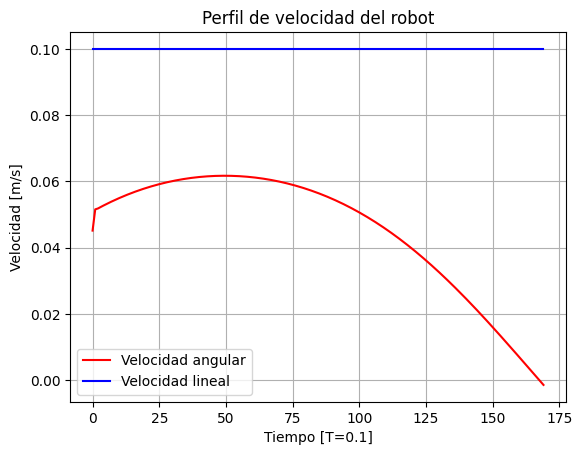

In [99]:
seguimiento_pared()
plot_historial()